<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

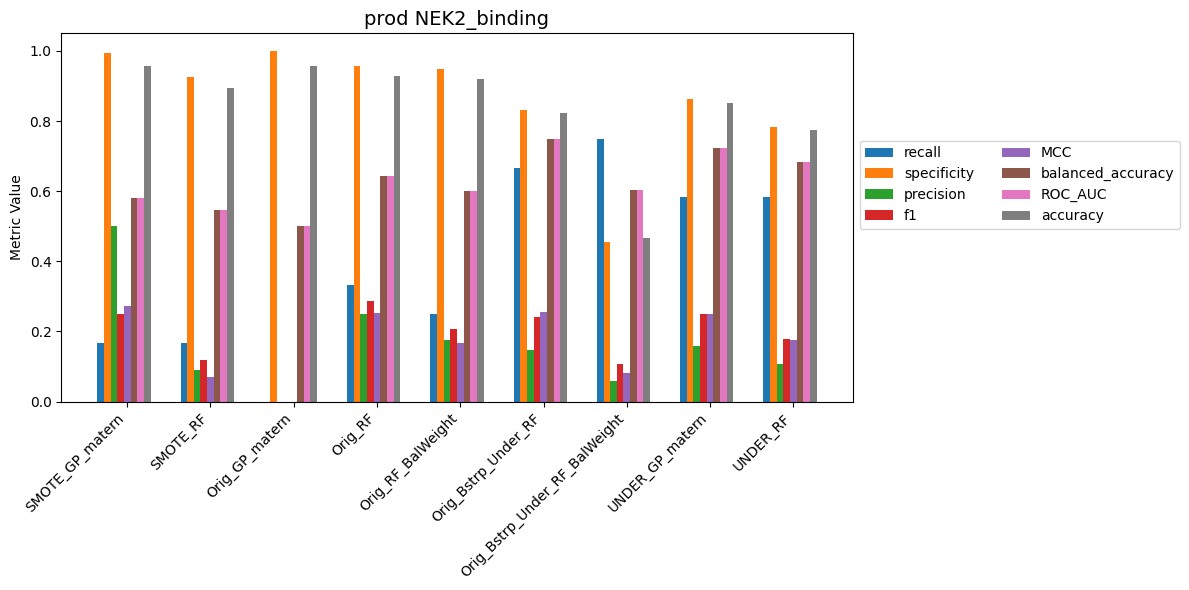

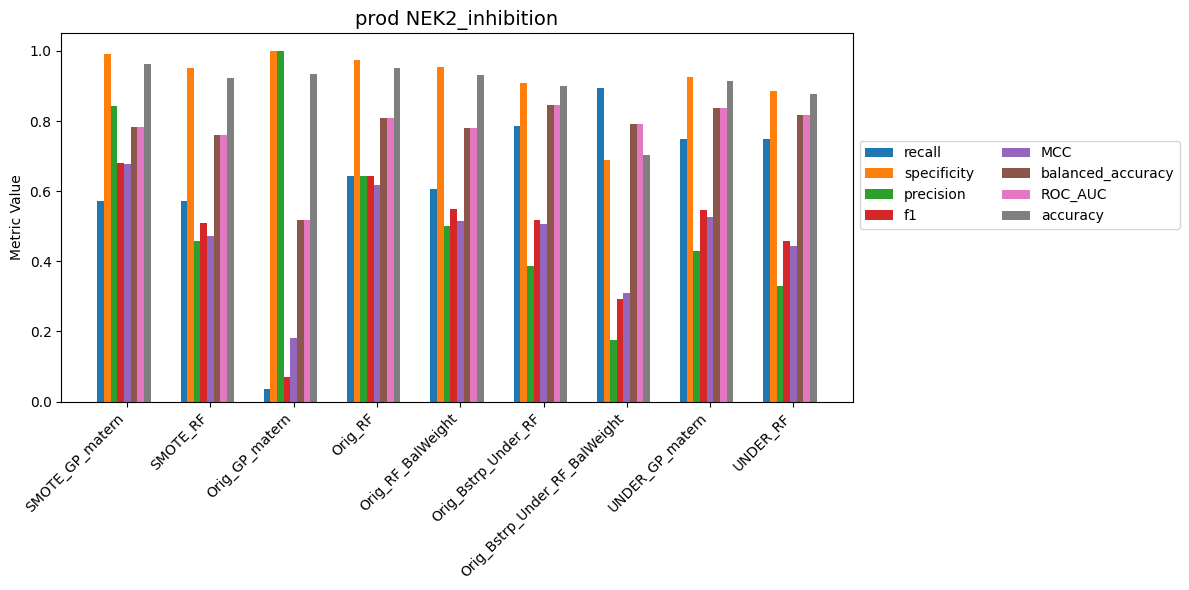

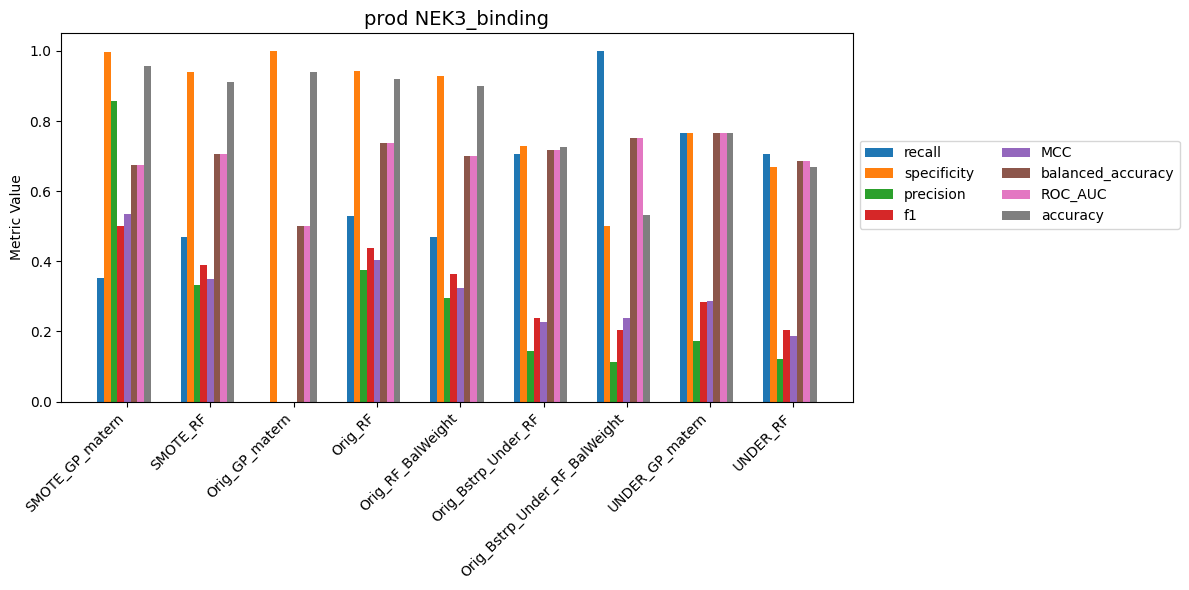

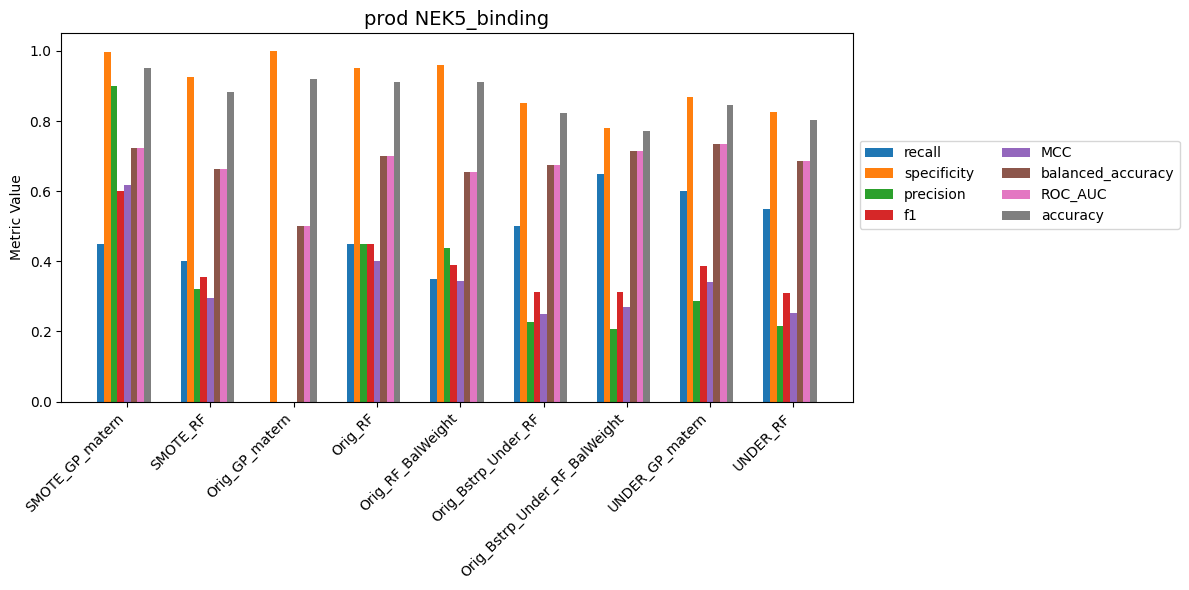

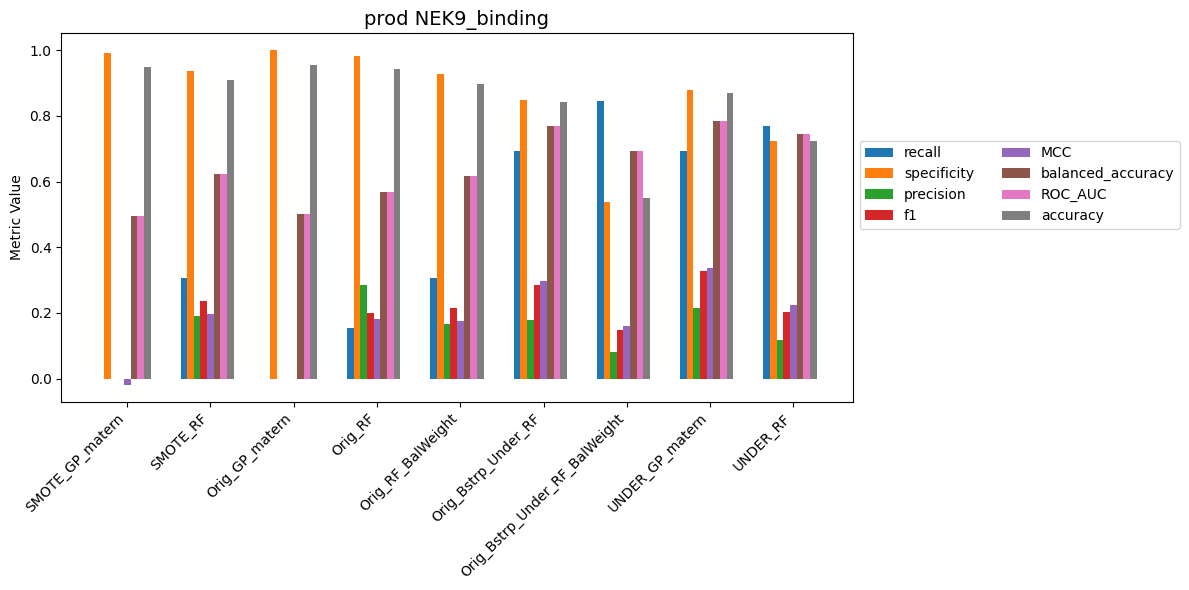

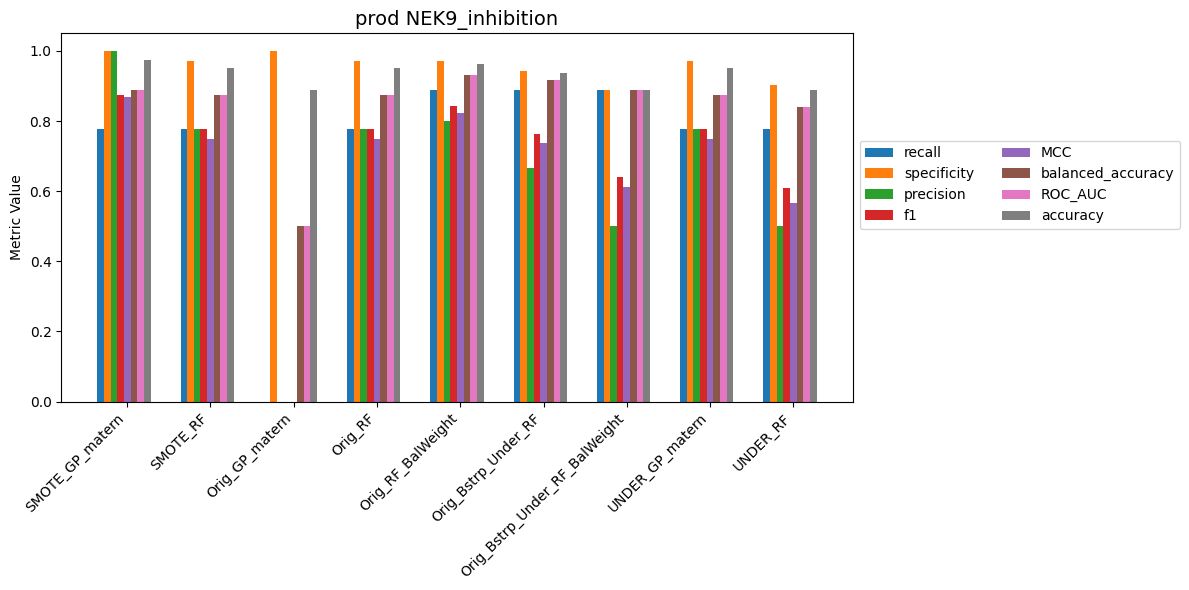

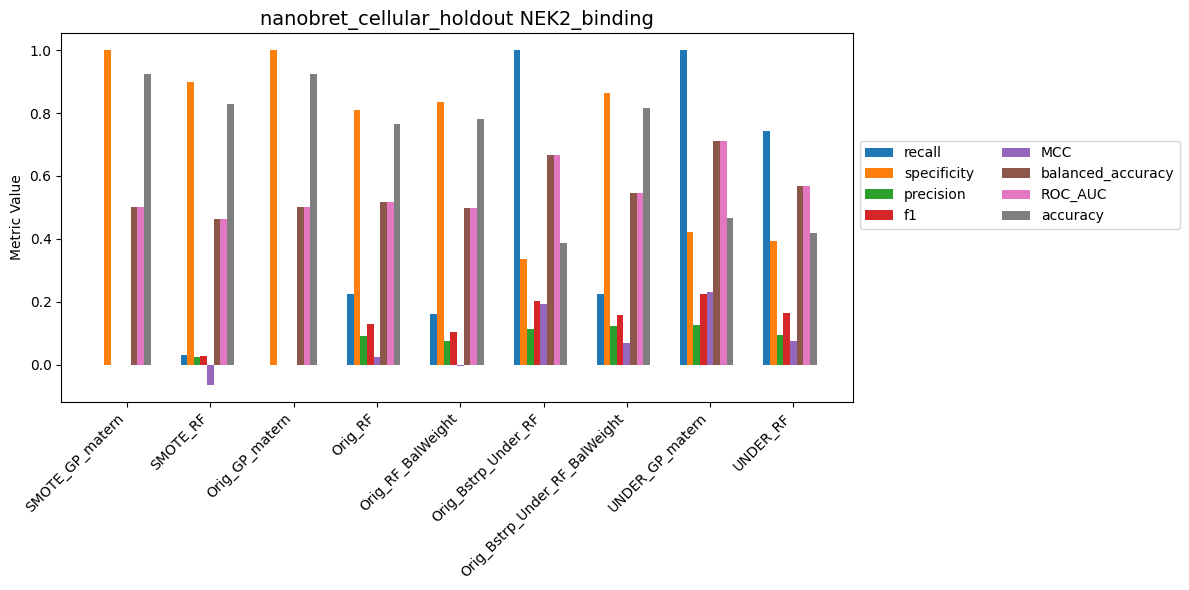

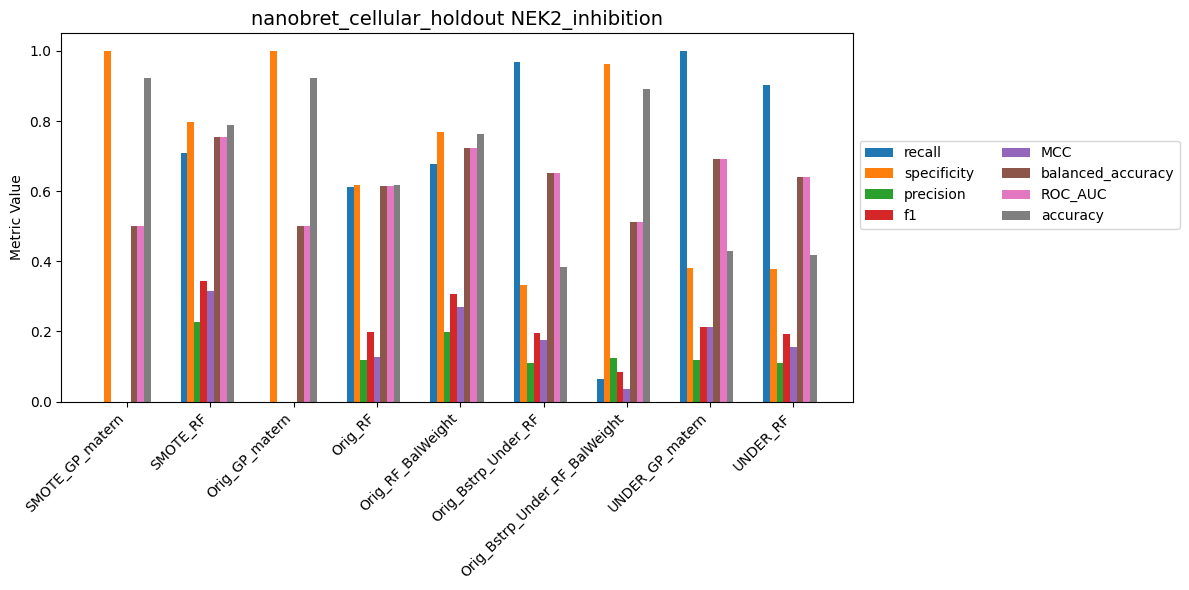

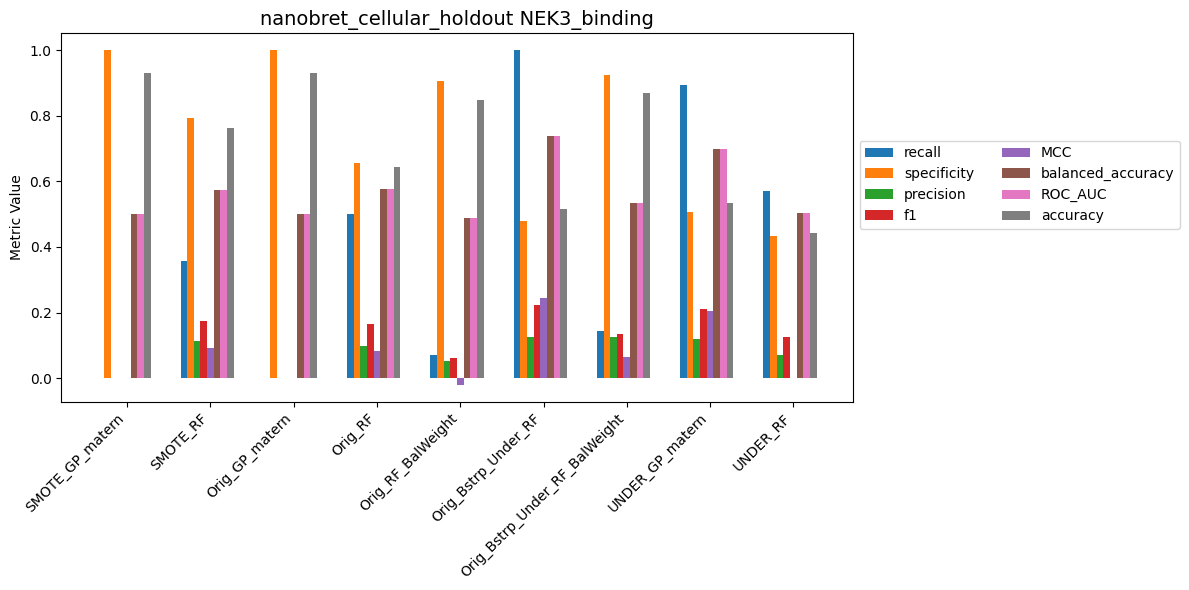

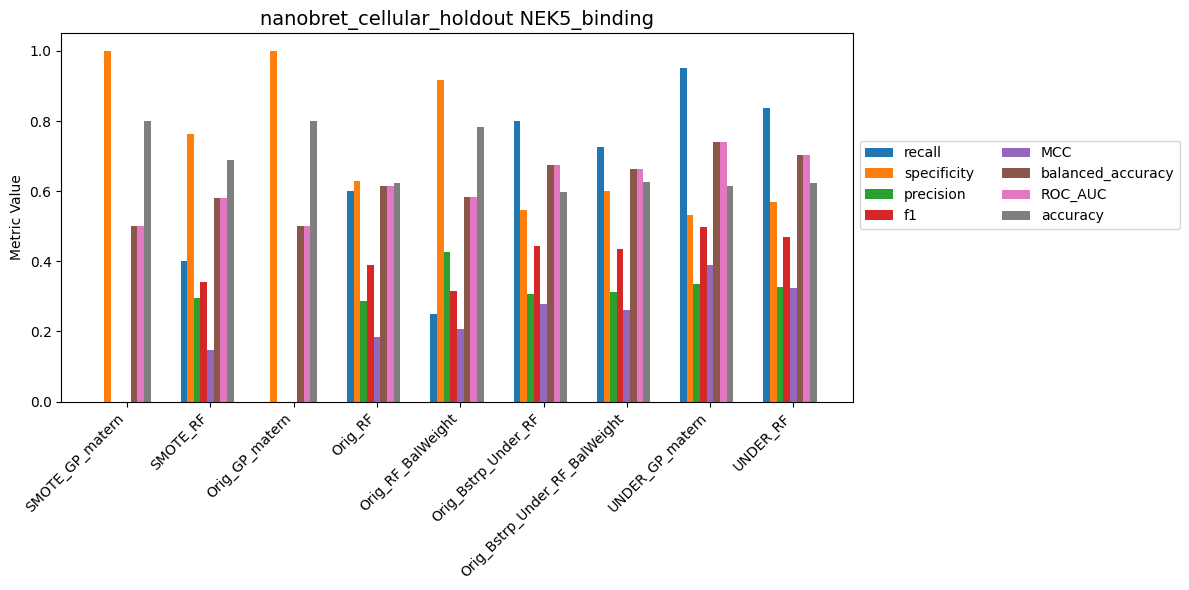

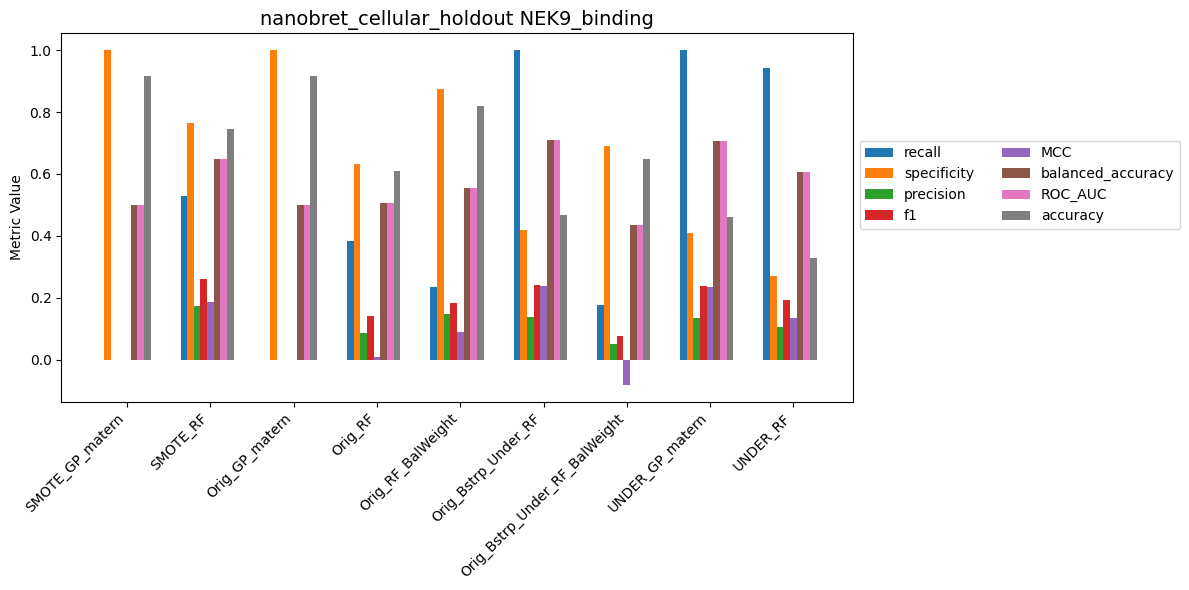

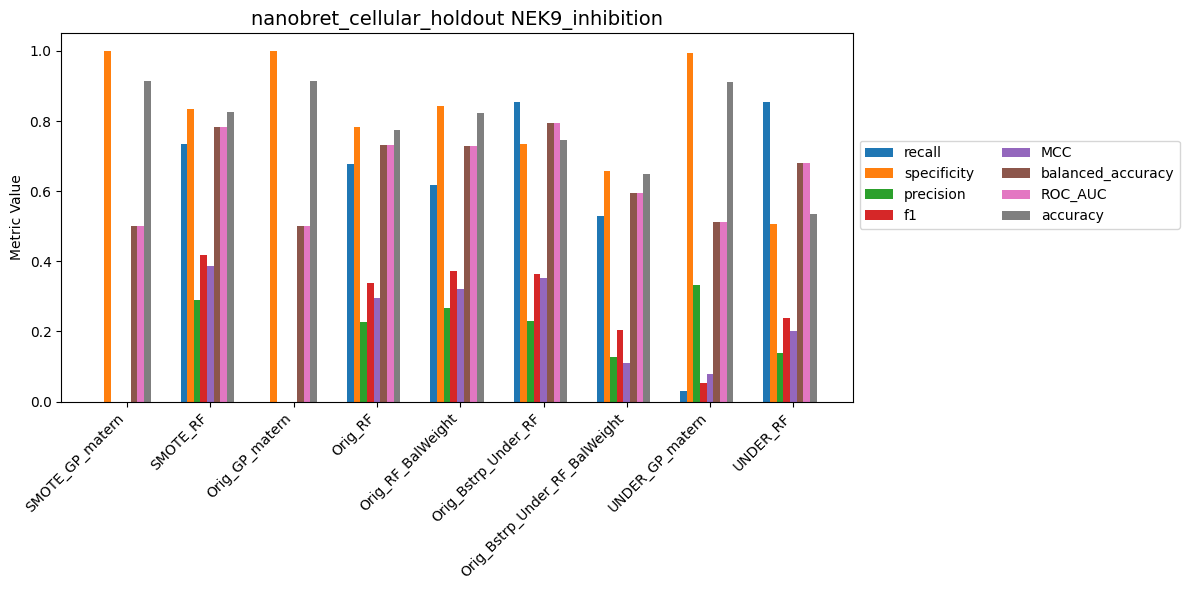

In [6]:
df_final = pd.read_csv("ALL_SETS_holdout1&2_GP&RF_results.csv")

allowed_strategies = [
    'SMOTE_GP_matern','SMOTE_RF','none_scaled_GP_matern',
    'none_scaled_RF', 'none_scaled_RF_BCW','none_scaled_BRFC', 
    'none_scaled_BRFC_BCW','UNDER_GP_matern', 'UNDER_RF'
]
strategy_rename = {
    "none_scaled_GP_matern": "Orig_GP_matern",
    "none_scaled_RF": "Orig_RF",
    "none_scaled_RF_BCW": "Orig_RF_BalWeight",
    "none_scaled_BRFC": "Orig_Bstrp_Under_RF",
    "none_scaled_BRFC_BCW": "Orig_Bstrp_Under_RF_BalWeight"
}


df_final = df_final[df_final["model strategy"].isin(allowed_strategies)]

metrics = [
    'recall','specificity','precision',
    'f1','MCC','balanced_accuracy','ROC_AUC','accuracy'
]

nek_list = [
    'NEK2_binding','NEK2_inhibition','NEK3_binding',
    'NEK5_binding','NEK9_binding','NEK9_inhibition'
]

sets_to_plot = ['prod','nanobret_cellular_holdout']

for current_set in sets_to_plot:
    for nek in nek_list:

        fig, ax = plt.subplots(1, 1, figsize=(12, 6))

        df_nek = df_final[
            (df_final["set"] == current_set) &
            (df_final["model NEK"] == nek) &
            (df_final["feat_type"] == "MFP")
        ]

        df_plot = (
            df_nek.groupby("model strategy")[metrics]
            .first()
            .reindex(allowed_strategies)
            .reset_index()
        )

        models = allowed_strategies
        x = np.arange(len(models))
        bar_width = 0.08

        for i, metric in enumerate(metrics):
            offset = (i - len(metrics) / 2) * bar_width
            ax.bar(
                x + offset,
                df_plot[metric],
                width=bar_width,
                label=metric
            )

        title = f"{current_set} {nek}"
        ax.set_title(title, fontsize=14)
        ax.set_xticks(x)
        #ax.set_xticklabels(models, rotation=45, ha="right")
        rename_labels = [strategy_rename.get(m, m) for m in models]
        ax.set_xticklabels(rename_labels, rotation=45, ha="right")
        ax.set_ylabel("Metric Value")
        ax.legend(loc="lower left", ncol=2,bbox_to_anchor=(1, .45))

        plt.tight_layout()

        filename = f"{current_set.upper()}_{nek}_Metrics_Histogram.png".replace(" ", "_")
        plt.savefig(filename, dpi=300)


In [ ]:
allowed_strategies = [
none_scaled_GP_matern == Orig_GP_matern
    'none_scaled_RF'== Orig_RF, 'none_scaled_RF_BCW'== Orig_RF_BalWeight,'none_scaled_BRFC == Orig_Bstrp_Under_RF', 
    'none_scaled_BRFC_BCW== Orig_Bstrp_Under_RF_BalWeight'
